<a href="https://colab.research.google.com/github/rainkiyoshi/CodeNext-ML-winter25/blob/main/TreesStarter_Codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees in Colab 🌳

**Code-Along**

Decision trees are a type of supervised machine learning algorithm that are used for both classification (predicting categories) and regression (predicting continuous values). They work by creating a tree-like structure of decisions, kind of like a flowchart, to arrive at a prediction.

## Step 1: Import Modules

For this colab, you will be using pandas, mathplotlib pyplot, and scikit-learn. Scikit-learn is an open-source Python module for machine learning. It is built on NumPy and SciPy and leverages these libraries for efficient numerical and scientific computing.

In [30]:
# Import pandas with the alias pd and Mathplotlib pyplot with the alias pd
import pandas as pd
import matplotlib.pyplot as plt


# Uncomment the statements below to import components of the scikit-learn module
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step 2: Create a DataFrame with Pandas

In [31]:
data = {'Weight': [150, 170, 130, 160, 140, 180, 120, 190, 155, 175, 165, 145],
        'Texture': [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1],
        'Fruit': ['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Banana', 'Banana', 'Banana', 'Apple', 'Banana', 'Apple', 'Apple']}

# Uncomment the code below to create a dataframe out of the above data
# df is the variable name for the new dataframe
df = pd.DataFrame(data)

# Print the dataframe to see its output
df.head()

,Weight,Texture,Fruit
0,150,1,Apple
1,170,1,Apple
2,130,1,Apple
3,160,1,Apple
4,140,1,Apple


## Step 3: Create Subsets of the Data

In [40]:
# This creates a dataframe stored in the variable x and has
# 2 columns, 'Weight' and 'Texture.' These will be the features for the model
x = df[['Weight', 'Texture']]

# This creates a dataframe stored in the variable y with 1 column, 'Fruit'
# This will be the label (outcome that is predicted) for the model
y = df['Fruit']

# Print out each of the dataframes to see their outputs
display(x)
print("\n")
display(y)


,Weight,Texture
0,150,1
1,170,1
2,130,1
3,160,1
4,140,1
5,180,0
6,120,0
7,190,0
8,155,1
9,175,0


,Fruit
0,Apple
1,Apple
2,Apple
3,Apple
4,Apple
5,Banana
6,Banana
7,Banana
8,Apple
9,Banana


## Step 4: Create Training & Testing Sets

Next we are going to split the data into training and testing sets by using the `train_test_split` function from the scikit-learn module. In this case, we will use 70% of the data as the training set and 30% as the testing set, as indicated by `test_size=0.3`.

Four variables will be created: `x_train, x_test, y_train`, and `y_test`

In [33]:
# Uncomment the following line of code to create the training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Print out the 4 variables, following the pattern of the first print statement
# Note: "\n" is an escape sequence that indicates a line break

# print("\nX_train:\n", x_train)
# print("\nX_test:\n", x_test)
# print("\nY_train:\n", y_train)
# print("\nY_test:\n", y_test)

display(x_train)
print("\n")
display(x_test)
print("\n")
display(y_train)
print("\n")
display(y_test)





,Weight,Texture
5,180,0
2,130,1
1,170,1
11,145,1
4,140,1
7,190,0
3,160,1
6,120,0


,Weight,Texture
10,165,1
9,175,0
0,150,1
8,155,1


,Fruit
5,Banana
2,Apple
1,Apple
11,Apple
4,Apple
7,Banana
3,Apple
6,Banana


,Fruit
10,Apple
9,Banana
0,Apple
8,Apple


## Step 5: Create & Train the Decision Tree Classifier

We will now create a machine learning model instance with scikit-learn!

In [34]:
# Create the ML model instance and store in the variable clf (for classifier)
clf = tree.DecisionTreeClassifier()

# Use the fit method from scikit-learn to train the ML model
clf = clf.fit(x_train, y_train)


## Step 6: Make Predictions

Now that the model is trained with the training data set, we will predict the fruit type for the test data using scikit-learn predict method.

In [35]:
predictions = clf.predict(x_test)

# Print Predictions and Actual Labels
print("Predictions:", predictions)

print("Actual Labels:", y_test.values)

display(predictions)

Predictions: ['Apple' 'Banana' 'Apple' 'Apple']
Actual Labels: ['Apple' 'Banana' 'Apple' 'Apple']


array(['Apple', 'Banana', 'Apple', 'Apple'], dtype=object)

## Step 7: Calculate Model Accuracy

Models aren't always 100% accurate, so it's important to understand how accurate your model is. You can do this with the scikit-learn function `accuracy_score()`

In [38]:
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy of the model

print("Accuracy:", accuracy)
display(accuracy)

Accuracy: 1.0


1.0

## Step 8: Create a Visualization of the Tree

Finally we will be using Matplotlib pyplot to visualize the decision tree

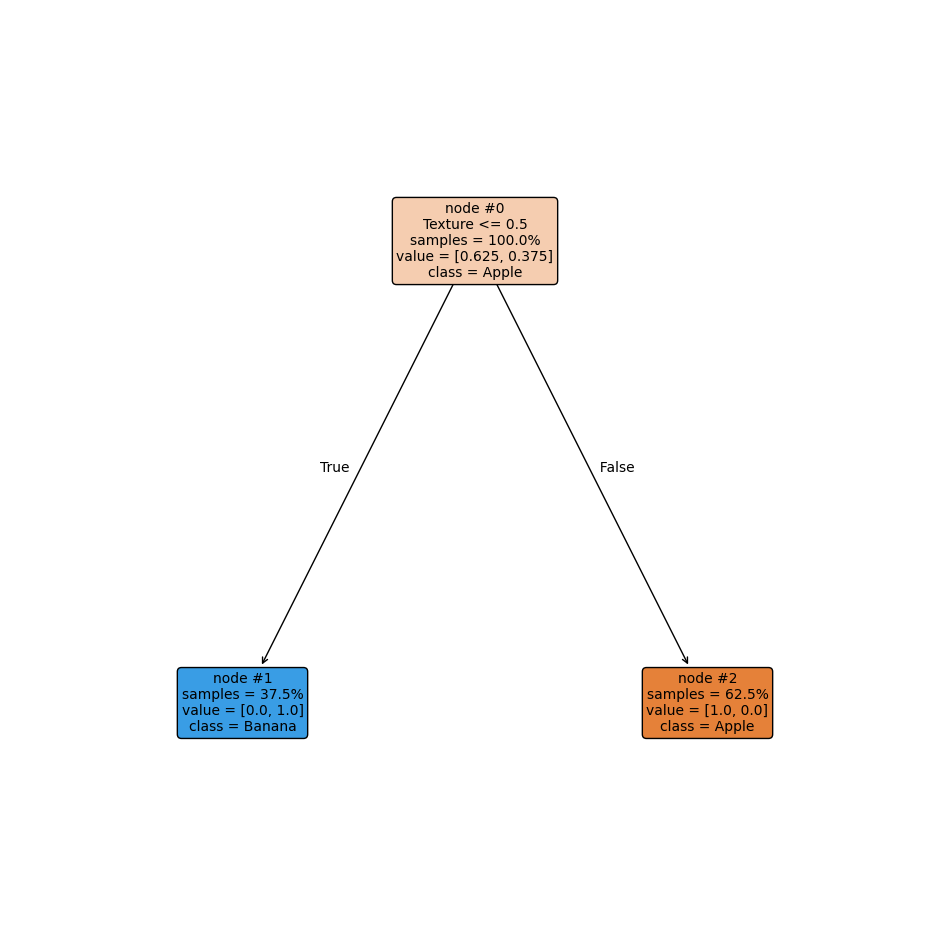

In [37]:
plt.figure(figsize=(12, 12))
tree.plot_tree(clf,
               feature_names=['Weight', 'Texture'],
               class_names=clf.classes_,
               filled=True,
               fontsize=10,  # Adjust font size
               node_ids=True,  # Display node IDs
               proportion=True, # Display proportions of samples
               rounded=True, # Round node edges for better visualization
               impurity=False) # Do not show the gini index or entropy for each node
plt.show()